In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import data_analysis_utilitites as da_utilities
import data_analysis_areas as da_area
from scipy.stats import shapiro, levene
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import numpy as np

In [2]:
data = da_utilities.load_all_criticality_data_no_duplicate_files('/home/bellijjy/criticality_analysis', ['_con', '_dav', '_dud', '_Cor', '_cha'], area=None, state=None, day=None, epoch=None, time_chunk=None)

In [3]:
data

,area,state,day,epoch,time_chunk,original_data,tau,branching_factor,popt,ssres,pcov,steps,dt,dtunit,quantiles,mrequantiles,tauquantiles,description
animal,,,,,,,,,,,,,,,,,,
_con,CA3,sleep,4,5,31,"{""5812450"":0.0,""5812451"":0.0,""5812451"":0.0,""58...",809.383114,0.998765,"[809.3831142879632, 0.0028221814500158336, 0.0...",0.167379,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,ms,None,None,None,None
_con,CA3,wake,5,4,26,"{""5123149"":0.0,""5123150"":0.0,""5123151"":0.0,""51...",407.667742,0.997550,"[407.667742474799, 0.01060809047340544, 0.0018...",0.147186,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,ms,None,None,None,None
_con,CA3,wake,3,2,4,"{""1012692"":0.0,""1012692"":0.0,""1012693"":0.0,""10...",381.053557,0.997379,"[381.0535573577768, 0.01554268953571666, -0.00...",0.141922,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,ms,None,None,None,None
_con,CA1,sleep,1,5,19,"{""4734163"":0.0,""4734164"":0.0,""4734165"":0.0,""47...",122.227841,0.991852,"[122.22784079579759, 0.01926377616625515, 0.00...",0.118211,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,ms,None,None,None,None
_con,CA3,sleep,2,1,6,"{""548425"":0.0,""548426"":0.0,""548427"":0.0,""54842...",13.013210,0.926033,"[13.013210026121635, 0.0676546445973937, 0.000...",0.127831,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,ms,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_cha,CA1,sleep,4,3,29,"{""11239985"":0.0,""11239985"":0.0,""11239986"":0.0,...",6.195645,0.850948,"[6.195645135021985, 0.1576662495992171, 0.0008...",0.147496,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,ms,None,None,None,None
_cha,CA1,wake,2,4,6,"{""4642993"":0.0,""4642994"":0.0,""4642995"":0.0,""46...",112.422062,0.991144,"[112.42206242980825, 0.0492342120124801, 0.000...",0.135027,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,ms,None,None,None,None
_cha,CA3,sleep,5,3,10,"{""9820989"":0.0,""9820990"":0.0,""9820990"":0.0,""98...",9.780898,0.902813,"[9.78089829027545, 0.17652115219380676, 1.8662...",0.175903,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,ms,None,None,None,None


In [4]:
def add_distance_to_criticality_column(df, branching_factor_column='branching_factor'):
    """
    Add a new column to the DataFrame that calculates the distance to criticality.
    
    Parameters:
    - df: DataFrame, the input DataFrame
    - branching_factor_column: str, the column name containing branching factor values
    
    Returns:
    - DataFrame with an additional 'distance_to_criticality' column
    """
    df['distance_to_criticality'] = np.log(1 - df[branching_factor_column])
    return df

# Add the distance_to_criticality column to the DataFrame
df_with_distance = add_distance_to_criticality_column(data)

df_with_distance

,area,state,day,epoch,time_chunk,original_data,tau,branching_factor,popt,ssres,pcov,steps,dt,dtunit,quantiles,mrequantiles,tauquantiles,description,distance_to_criticality
animal,,,,,,,,,,,,,,,,,,,
_con,CA3,sleep,4,5,31,"{""5812450"":0.0,""5812451"":0.0,""5812451"":0.0,""58...",809.383114,0.998765,"[809.3831142879632, 0.0028221814500158336, 0.0...",0.167379,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,ms,None,None,None,None,-6.696890
_con,CA3,wake,5,4,26,"{""5123149"":0.0,""5123150"":0.0,""5123151"":0.0,""51...",407.667742,0.997550,"[407.667742474799, 0.01060809047340544, 0.0018...",0.147186,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,ms,None,None,None,None,-6.011679
_con,CA3,wake,3,2,4,"{""1012692"":0.0,""1012692"":0.0,""1012693"":0.0,""10...",381.053557,0.997379,"[381.0535573577768, 0.01554268953571666, -0.00...",0.141922,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,ms,None,None,None,None,-5.944252
_con,CA1,sleep,1,5,19,"{""4734163"":0.0,""4734164"":0.0,""4734165"":0.0,""47...",122.227841,0.991852,"[122.22784079579759, 0.01926377616625515, 0.00...",0.118211,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,ms,None,None,None,None,-4.809975
_con,CA3,sleep,2,1,6,"{""548425"":0.0,""548426"":0.0,""548427"":0.0,""54842...",13.013210,0.926033,"[13.013210026121635, 0.0676546445973937, 0.000...",0.127831,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,ms,None,None,None,None,-2.604141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_cha,CA1,sleep,4,3,29,"{""11239985"":0.0,""11239985"":0.0,""11239986"":0.0,...",6.195645,0.850948,"[6.195645135021985, 0.1576662495992171, 0.0008...",0.147496,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,ms,None,None,None,None,-1.903463
_cha,CA1,wake,2,4,6,"{""4642993"":0.0,""4642994"":0.0,""4642995"":0.0,""46...",112.422062,0.991144,"[112.42206242980825, 0.0492342120124801, 0.000...",0.135027,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,ms,None,None,None,None,-4.726704
_cha,CA3,sleep,5,3,10,"{""9820989"":0.0,""9820990"":0.0,""9820990"":0.0,""98...",9.780898,0.902813,"[9.78089829027545, 0.17652115219380676, 1.8662...",0.175903,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,ms,None,None,None,None,-2.331116


In [5]:
formula = "distance_to_criticality ~ area * state * day"
formulas_reduced = ["distance_to_criticality ~ state * day", "distance_to_criticality ~ area * day", "distance_to_criticality ~ area * state"]

In [6]:
#This model is with REML
model_with_reml = smf.mixedlm(formula, data=data, groups=data.index.get_level_values('animal'))

fit_result_reml = model_with_reml.fit()
        
print(fit_result_reml.summary())

                  Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  distance_to_criticality
No. Observations:   5235     Method:              REML                   
No. Groups:         5        Scale:               3.1770                 
Min. group size:    453      Log-Likelihood:      -10475.0371            
Max. group size:    1492     Converged:           Yes                    
Mean group size:    1047.0                                               
-------------------------------------------------------------------------
                              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                     -5.232    0.216 -24.241 0.000 -5.655 -4.809
area[T.CA3]                    0.379    0.188   2.021 0.043  0.011  0.747
state[T.wake]                 -1.374    0.201  -6.844 0.000 -1.768 -0.981
area[T.CA3]:state[T.wake]      1.582    0.267   5.934 0.

In [7]:
#This model is with ML -- but the output is robust to the method used, so we can safely go about using ML for model comparison
model_with_ml = smf.mixedlm(formula, data=data, groups=data.index.get_level_values('animal'))

fit_result_ml = model_with_ml.fit(reml = False)
        
print(fit_result_ml.summary())

                  Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  distance_to_criticality
No. Observations:   5235     Method:              ML                     
No. Groups:         5        Scale:               3.1727                 
Min. group size:    453      Log-Likelihood:      -10458.6686            
Max. group size:    1492     Converged:           Yes                    
Mean group size:    1047.0                                               
-------------------------------------------------------------------------
                              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                     -5.234    0.204 -25.623 0.000 -5.635 -4.834
area[T.CA3]                    0.383    0.188   2.039 0.041  0.015  0.750
state[T.wake]                 -1.371    0.201  -6.833 0.000 -1.765 -0.978
area[T.CA3]:state[T.wake]      1.578    0.266   5.923 0.

In [8]:
from scipy.stats import chi2

def compare_models(base_formula, reduced_formulas, data, groups):
    """
    Compare a base mixed-effects model to several reduced models using likelihood ratio tests. Use the ML instead of the REML
    as the ML partializes the fixed effects out -- and it is precisely those that are of interest.
    
    Parameters:
    - base_formula: str, formula for the base model
    - reduced_formulas: list of str, formulas for the reduced models
    - data: DataFrame, the data
    - groups_column: str, the column name to use for groups (random effects)
    
    Returns:
    - dict, Likelihood ratio statistics, p-values, degrees of freedom for each reduced model
    """
    
    # Fit the base model and obtain its log-likelihood
    base_model = smf.mixedlm(base_formula, data=data, groups=groups)
    base_fit_result = base_model.fit(reml = False)
    base_loglike = base_fit_result.llf
    
    # Initialize a dictionary to store comparison results
    comparison_results = {}
    
    # Loop through each reduced formula and compare to the base model
    for formula_i in reduced_formulas:
        # Fit the reduced model and obtain its log-likelihood
        model_i = smf.mixedlm(formula_i, data=data, groups=groups)
        fit_result_i = model_i.fit(reml = False)
        reduced_loglike = fit_result_i.llf
        
        # Manually calculate the likelihood ratio test statistic
        lr_stat = -2 * (reduced_loglike - base_loglike)
        
        # Calculate the p-value
        df_diff = base_fit_result.df_modelwc - fit_result_i.df_modelwc
        p_value = chi2.sf(lr_stat, df_diff)
        
        #Store the results along with AIC and BIC
        comparison_results[formula_i] = {
            'LR Statistic': lr_stat, 
            'p-value': p_value, 
            'df difference': df_diff   
        }
        
    return comparison_results

# Sample function call (Note: This is a placeholder; actual data would be used in practice)
results = compare_models(formula, formulas_reduced, data, groups=data.index.get_level_values('animal'))
results

{'distance_to_criticality ~ state * day': {'LR Statistic': 179.00468601872853,
  'p-value': 1.2197929989928612e-37,
  'df difference': 4},
 'distance_to_criticality ~ area * day': {'LR Statistic': 314.29093146034575,
  'p-value': 8.946396084570577e-67,
  'df difference': 4},
 'distance_to_criticality ~ area * state': {'LR Statistic': 55.141242813610006,
  'p-value': 3.0349458498609514e-11,
  'df difference': 4}}

Group: ('_Cor', 'CA1', 'wake'), Shapiro-Wilk test for normality: Test Statistic = 0.923505425453186, p-value = 2.8501315890716583e-11
Group: ('_Cor', 'CA3', 'sleep'), Shapiro-Wilk test for normality: Test Statistic = 0.8973234295845032, p-value = 3.6474163668748574e-14
Group: ('_Cor', 'CA3', 'wake'), Shapiro-Wilk test for normality: Test Statistic = 0.9228006601333618, p-value = 8.17483288093751e-14
Group: ('_cha', 'CA1', 'sleep'), Shapiro-Wilk test for normality: Test Statistic = 0.9479563236236572, p-value = 7.92161954450421e-05
Group: ('_cha', 'CA1', 'wake'), Shapiro-Wilk test for normality: Test Statistic = 0.9402108192443848, p-value = 1.8908781385107432e-07
Group: ('_cha', 'CA3', 'sleep'), Shapiro-Wilk test for normality: Test Statistic = 0.9560906887054443, p-value = 0.032565269619226456
Group: ('_cha', 'CA3', 'wake'), Shapiro-Wilk test for normality: Test Statistic = 0.8374781012535095, p-value = 1.3266725318317185e-06
Group: ('_con', 'CA1', 'sleep'), Shapiro-Wilk test for norm

<ipython-input-13-142eaab3b4a9>:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Group: ('_dav', 'CA3', 'sleep'), Shapiro-Wilk test for normality: Test Statistic = 0.9675710797309875, p-value = 0.003029590705409646
Group: ('_dav', 'CA3', 'wake'), Shapiro-Wilk test for normality: Test Statistic = 0.9482823610305786, p-value = 7.98339897301048e-06
Group: ('_dud', 'CA1', 'sleep'), Shapiro-Wilk test for normality: Test Statistic = 0.880114734172821, p-value = 2.3833728366546778e-15
Group: ('_dud', 'CA1', 'wake'), Shapiro-Wilk test for normality: Test Statistic = 0.9090612530708313, p-value = 4.213836224398193e-11
Group: ('_dud', 'CA3', 'sleep'), Shapiro-Wilk test for normality: Test Statistic = 0.9926570057868958, p-value = 0.003435035701841116
Group: ('_dud', 'CA3', 'wake'), Shapiro-Wilk test for normality: Test Statistic = 0.9849494099617004, p-value = 0.004273495636880398
Levene's test for homoscedasticity: Test Statistic = 21.956546415690138, p-value = 6.403717901462675e-70
Variance Inflation Factors:
      Feature       VIF
0         day  3.388068
1    area_CA3  2

<Figure size 432x288 with 0 Axes>

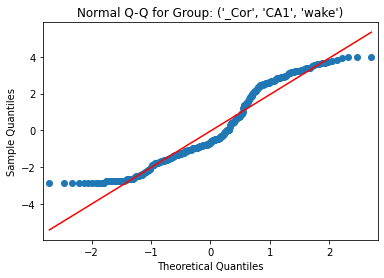

<Figure size 432x288 with 0 Axes>

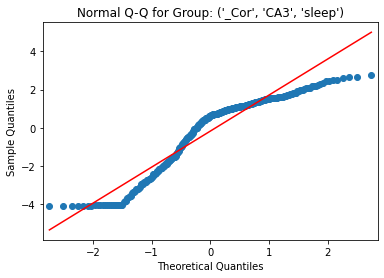

<Figure size 432x288 with 0 Axes>

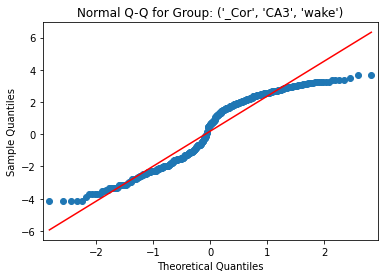

<Figure size 432x288 with 0 Axes>

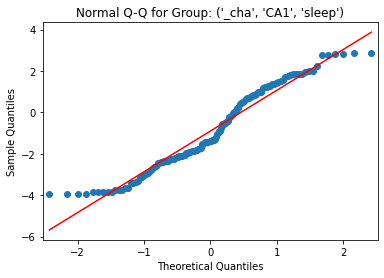

<Figure size 432x288 with 0 Axes>

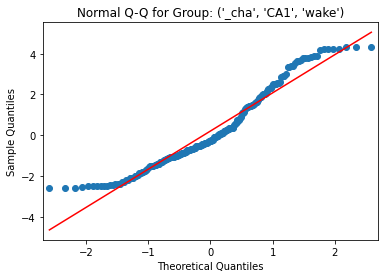

<Figure size 432x288 with 0 Axes>

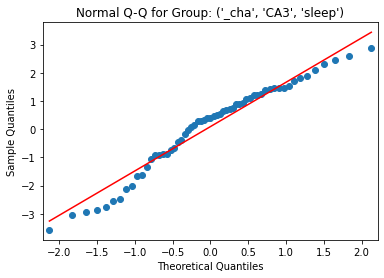

<Figure size 432x288 with 0 Axes>

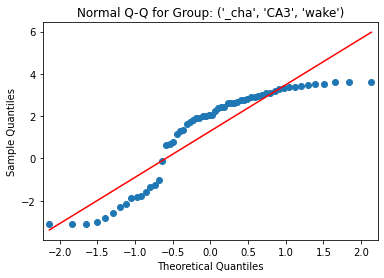

<Figure size 432x288 with 0 Axes>

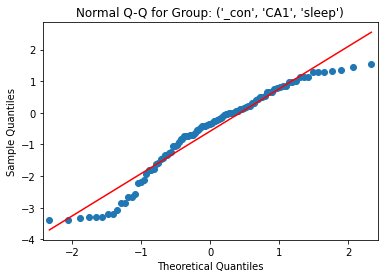

<Figure size 432x288 with 0 Axes>

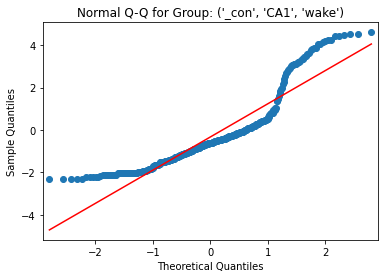

<Figure size 432x288 with 0 Axes>

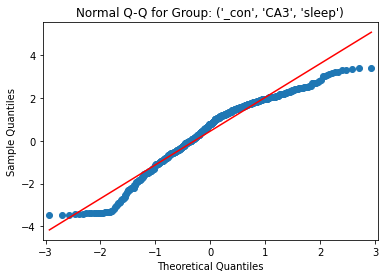

<Figure size 432x288 with 0 Axes>

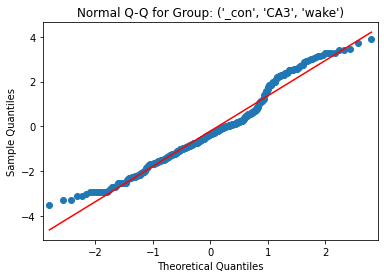

<Figure size 432x288 with 0 Axes>

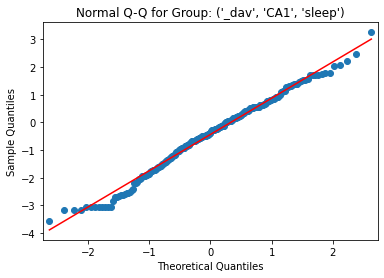

<Figure size 432x288 with 0 Axes>

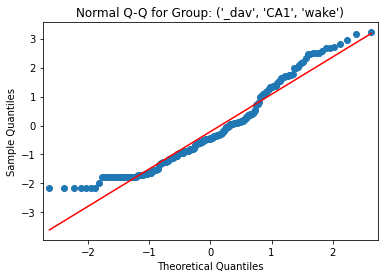

<Figure size 432x288 with 0 Axes>

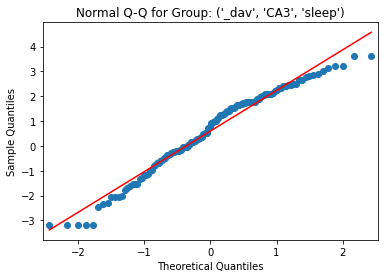

<Figure size 432x288 with 0 Axes>

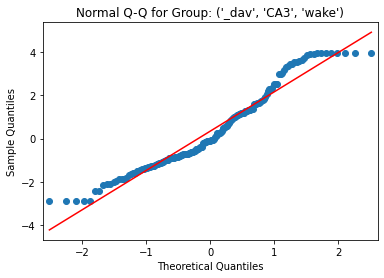

<Figure size 432x288 with 0 Axes>

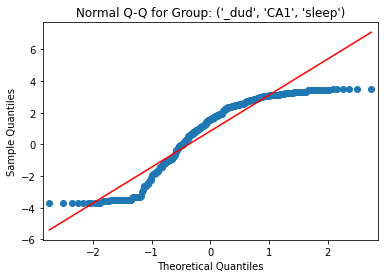

<Figure size 432x288 with 0 Axes>

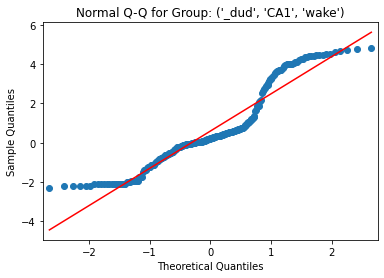

<Figure size 432x288 with 0 Axes>

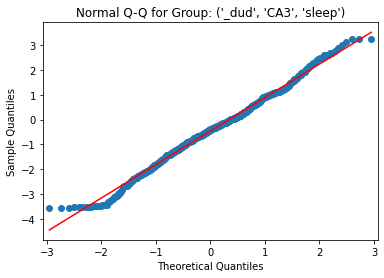

<Figure size 432x288 with 0 Axes>

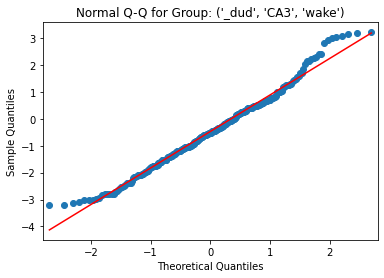

In [13]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import anderson, levene
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

def check_mixed_model_assumptions(fit_result, data, dependent_var, group_var, predictors):
    """
    Check the assumptions of a linear mixed-effects model.
    
    Parameters:
    - fit_result: mixedlm fit result object, the fitted mixed-effects model
    - data: DataFrame, the original data
    - dependent_var: str, the dependent variable
    - group_var: str, the grouping variable for random effects
    - residual_type: str, the type of residuals to extract ('pearson', 'deviance', etc.)
    
    Returns:
    - None, but prints test results and plots graphs for visual inspection
    """
    # Extract residuals and fitted values
    residuals = fit_result.resid
    fitted_vals = fit_result.fittedvalues
    
    # Check if the order of the indices matches
    if not data.index.unique().equals(residuals.index.unique()):
        raise IndexError('The index order is shuffled')
    
    # Add residuals back to the original data
    data_with_residuals = data.copy()
    data_with_residuals['residuals'] = residuals.values
    
    # Group by all relevant factors
    grouped = data_with_residuals.groupby(['animal', 'area', 'state'])
    
    # Create a container to hold residuals for Levene's test
    residual_groups = []
    
    # Iterate through each group and perform Shapiro-Wilk and Anderson-Darling tests
    for name, group in grouped:
        #Shapiro-Wilk test for normality
        shapiro_test_stat, shapiro_p_value = shapiro(group['residuals'])
        print(f"Group: {name}, Shapiro-Wilk test for normality: Test Statistic = {shapiro_test_stat}, p-value = {shapiro_p_value}")
        
        # Anderson-Darling test for normality
        #ad_result = anderson(group['residuals'])
        #print(f"Group: {name}, Anderson-Darling test for normality: Test Statistic = {ad_result.statistic}, Critical Values = {ad_result.critical_values}, Significance Levels = {ad_result.significance_level}")
        
        # QQ-Plot for each group
        plt.figure()
        qqplot(group['residuals'], line='s')
        plt.title(f'Normal Q-Q for Group: {name}')
        
        # Collect residuals for Levene's test
        residual_groups.append(group['residuals'])
    
    # Levene's test for homoscedasticity
    levene_test_stat, levene_p_value = levene(*residual_groups)
    print(f"Levene's test for homoscedasticity: Test Statistic = {levene_test_stat}, p-value = {levene_p_value}")

    # Create a DataFrame with only the predictors used in the model
    X = data[predictors].copy()  # Use copy() to avoid SettingWithCopyWarning
    
    # Identify numeric and categorical columns
    numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
    categorical_cols = list(set(X.columns) - set(numeric_cols))
    
    # One-hot encode only categorical variables
    if categorical_cols:
        X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
    
    # Remove rows with missing or infinite values
    X = X.replace([np.inf, -np.inf], np.nan).dropna()
    
    # Convert Boolean columns to integers
    X = X * 1  # This will convert True to 1 and False to 0

    if X.empty:
        print("After cleaning, the data frame for VIF calculation is empty. Skipping VIF calculation.")
        return
    
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    
    print("Variance Inflation Factors:")
    print(vif_data)

check_mixed_model_assumptions(fit_result_ml, data, dependent_var='distance_to_criticality', group_var='animal', predictors= ['area', 'state', 'day'])


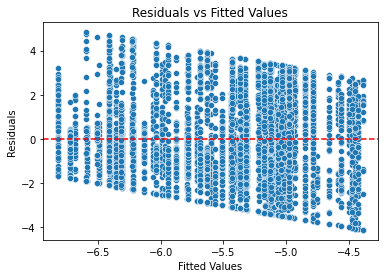

Pearson correlation between residuals and fitted values: 0.0026644158133848784
Spearman correlation between residuals and fitted values: 0.04390280180418444


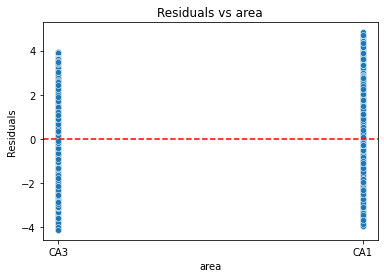

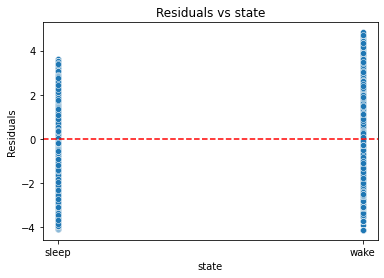

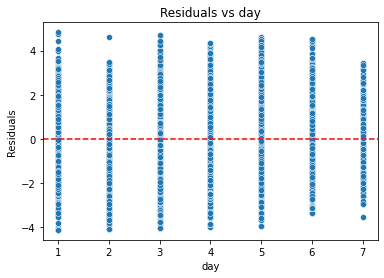

In [10]:
from scipy.stats import spearmanr, pearsonr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def check_linearity(fit_result, data, dependent_var, predictors):
    """
    Check the linearity assumption of a mixed-effects model by plotting residuals vs fitted values
    and residuals vs each predictor, and by calculating correlation coefficients.
    
    Parameters:
    - fit_result: mixedlm fit result object, the fitted mixed-effects model
    - data: DataFrame, the original data
    - dependent_var: str, the dependent variable
    - predictors: list of str, the predictor variables
    
    Returns:
    - None, but plots graphs for visual inspection and prints correlation coefficients
    """
    
    # Extract residuals and fitted values
    residuals = fit_result.resid
    fitted_vals = fit_result.fittedvalues
    
    # Check if the order of the indices matches
    if not data.index.unique().equals(residuals.index.unique()):
        raise IndexError('The index order is shuffled')
    
    # Add residuals and fitted values back to the original data
    data_with_residuals = data.copy()
    data_with_residuals['residuals'] = residuals.values
    data_with_residuals['fitted_vals'] = fitted_vals.values
    
    # Plot residuals vs fitted values
    plt.figure()
    sns.scatterplot(x='fitted_vals', y='residuals', data=data_with_residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Residuals vs Fitted Values")
    plt.xlabel("Fitted Values")
    plt.ylabel("Residuals")
    plt.show()
    
    # Calculate Pearson and Spearman correlation for residuals vs fitted values
    pearson_corr, _ = pearsonr(data_with_residuals['fitted_vals'], data_with_residuals['residuals'])
    spearman_corr, _ = spearmanr(data_with_residuals['fitted_vals'], data_with_residuals['residuals'])
    print(f"Pearson correlation between residuals and fitted values: {pearson_corr}")
    print(f"Spearman correlation between residuals and fitted values: {spearman_corr}")
    
    # Plot residuals vs each predictor and calculate correlation coefficients
    for predictor in predictors:
        plt.figure()
        sns.scatterplot(x=predictor, y='residuals', data=data_with_residuals)
        plt.axhline(0, color='red', linestyle='--')
        plt.title(f"Residuals vs {predictor}")
        plt.xlabel(predictor)
        plt.ylabel("Residuals")
        plt.show()

check_linearity(fit_result_ml, data, dependent_var='distance_to_criticality', predictors=['area', 'state', 'day'])

